In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.2:
            print('\nloss is low so cancelling training')
            self.model.stop_training = True

In [10]:
callback = mycallback()

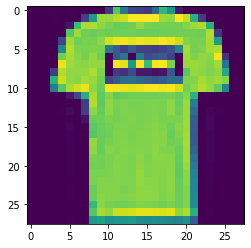

In [5]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()
plt.imshow(train_image[1])
train_image = train_image.reshape(60000, 28, 28, 1)
train_image = train_image / 255
test_image = test_image.reshape(10000, 28, 28, 1)
test_image = test_image / 255

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))) # input_shape=(28,28,1)，其中1代表：计算颜色的深度
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy)
model.fit(train_image, train_label, epochs=10, callbacks=[callback])

Train on 60000 samples
Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.1032
loss is low so cancelling training
60000/60000 [==============================] - 53s 876us/sample - loss: 0.1033


In [7]:
test_loss = model.evaluate(test_image, test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [11]:
print(test_label[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


NameError: name 'model' is not defined

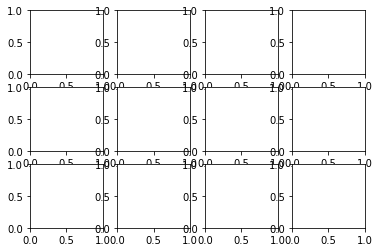

In [7]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=2
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_image[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_image[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_image[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)